<a href="https://colab.research.google.com/github/XavierCarrera/Datascience/blob/main/InmueblesPeru_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import norm 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("/content/drive/MyDrive/inmuebles_datasets/pe_properties.csv")
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,OHnwRj8WCByyWFlzr8CG2w==,Propiedad,2019-06-25,2019-07-23,2019-06-25,-12.094636,-77.003267,Perú,Lima,Lima,San Borja,NaN,NaN,NaN,NaN,NaN,207.0,120.0,380000.0,USD,Mensual,SE VENDE CASITA SAN BORJA NORTE 446 4 HABITACI...,Se vende CASITA en condominio La casita empiez...,Casa,Venta
1,+r81Zjmgyd2Y+cguWfoHhw==,Propiedad,2019-06-25,2019-12-25,2019-06-25,-12.094851,-77.017706,Perú,Lima,Lima,San Isidro,NaN,NaN,4.0,NaN,NaN,347.0,319.0,800000.0,USD,Mensual,VENDO ELEGANTE CASA EN SAN ISIDRO,VENDO ELEGANTE CASA EN SAN ISIDRO. AMPLIA SALA...,Casa,Venta
2,TP2j5KyjkY1glXvrCBoqkA==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-12.071644,-77.037922,Perú,Lima,Lima,Jesús María,NaN,NaN,NaN,NaN,NaN,500.0,500.0,2250000.0,USD,Mensual,¡ Se vende Terreno en Excelente Zona de Jesus ...,"Casa como terreno en venta, ubicada en toda un...",Casa,Venta
3,PF2/BiUsiKTU8i7mFBGq3A==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-11.960901,-77.062730,Perú,Lima,Lima,Comas,NaN,NaN,NaN,NaN,NaN,224.0,126.0,152000.0,USD,Mensual,SE VENDE LINDA CASA EN LA MISMA AV METROPOLITA...,"LINDA CASA EN VENTA, FRENTE AL CENTRO DE IDIOM...",Casa,Venta
4,LgOzukt3/c7bYO7SNzFbUw==,Propiedad,2019-06-25,2019-07-10,2019-06-25,-12.102991,-76.938083,Perú,Lima,Lima,La Molina,NaN,NaN,5.0,NaN,NaN,378.0,320.0,490000.0,USD,Mensual,SE VENDE HERMOSA Y AMPLIA CASA EN LA MOLINA,Se vende hermosa casa en La Molina 5 Habitacio...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124444,+Y5fWov06qCfEp9ob/H7zA==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.231483,-76.922521,Perú,Lima,Lima,Villa el Salvador,NaN,NaN,13.0,NaN,8.0,345.0,100.0,110000.0,USD,Mensual,Vendo Casa de 3 pisos en excelente estado.,La casa se encuentra ubicada a 2 paralelas de ...,Casa,Venta
124445,kTkm29my58VQpyyzdbDPEA==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.231483,-76.922521,Perú,Lima,Lima,Villa el Salvador,NaN,NaN,13.0,NaN,8.0,345.0,100.0,110000.0,USD,Mensual,Vendo oficinas de 3 pisos en excelente estado.,La oficina se encuentra ubicada a 2 paralelas ...,Oficina,Venta
124446,RouH2Y4skOZv9WWBOSefjQ==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.229596,-76.924409,Perú,Lima,Lima,Villa el Salvador,NaN,NaN,13.0,NaN,8.0,345.0,100.0,110000.0,USD,Mensual,Vendo local de 3 pisos en excelente estado.,El local se encuentra ubicada a 2 paralelas de...,Local comercial,Venta
124447,B7aeJHvIlJcMRwT/NM5YKQ==,Propiedad,2019-04-22,2019-07-04,2019-04-22,-12.006671,-77.086546,Perú,Lima,Lima,San Martín de Porres,NaN,NaN,12.0,NaN,8.0,581.0,160.0,320000.0,USD,Mensual,CASA CUATRO PISOS INDEPENDIZADOS A MEDIA CUADR...,Gran oportunidad de venta para inversionistas ...,Casa,Venta


In [20]:
df.drop(["l5", "l6", "surface_covered", "price_period"], axis=1, inplace=True)
df

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,price,currency,title,description,property_type,operation_type
0,OHnwRj8WCByyWFlzr8CG2w==,Propiedad,2019-06-25,2019-07-23,2019-06-25,-12.094636,-77.003267,Perú,Lima,Lima,San Borja,NaN,NaN,NaN,207.0,380000.0,USD,SE VENDE CASITA SAN BORJA NORTE 446 4 HABITACI...,Se vende CASITA en condominio La casita empiez...,Casa,Venta
1,+r81Zjmgyd2Y+cguWfoHhw==,Propiedad,2019-06-25,2019-12-25,2019-06-25,-12.094851,-77.017706,Perú,Lima,Lima,San Isidro,4.0,NaN,NaN,347.0,800000.0,USD,VENDO ELEGANTE CASA EN SAN ISIDRO,VENDO ELEGANTE CASA EN SAN ISIDRO. AMPLIA SALA...,Casa,Venta
2,TP2j5KyjkY1glXvrCBoqkA==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-12.071644,-77.037922,Perú,Lima,Lima,Jesús María,NaN,NaN,NaN,500.0,2250000.0,USD,¡ Se vende Terreno en Excelente Zona de Jesus ...,"Casa como terreno en venta, ubicada en toda un...",Casa,Venta
3,PF2/BiUsiKTU8i7mFBGq3A==,Propiedad,2019-06-25,2019-09-03,2019-06-25,-11.960901,-77.062730,Perú,Lima,Lima,Comas,NaN,NaN,NaN,224.0,152000.0,USD,SE VENDE LINDA CASA EN LA MISMA AV METROPOLITA...,"LINDA CASA EN VENTA, FRENTE AL CENTRO DE IDIOM...",Casa,Venta
4,LgOzukt3/c7bYO7SNzFbUw==,Propiedad,2019-06-25,2019-07-10,2019-06-25,-12.102991,-76.938083,Perú,Lima,Lima,La Molina,5.0,NaN,NaN,378.0,490000.0,USD,SE VENDE HERMOSA Y AMPLIA CASA EN LA MOLINA,Se vende hermosa casa en La Molina 5 Habitacio...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124444,+Y5fWov06qCfEp9ob/H7zA==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.231483,-76.922521,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Vendo Casa de 3 pisos en excelente estado.,La casa se encuentra ubicada a 2 paralelas de ...,Casa,Venta
124445,kTkm29my58VQpyyzdbDPEA==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.231483,-76.922521,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Vendo oficinas de 3 pisos en excelente estado.,La oficina se encuentra ubicada a 2 paralelas ...,Oficina,Venta
124446,RouH2Y4skOZv9WWBOSefjQ==,Propiedad,2019-04-22,2019-06-08,2019-04-22,-12.229596,-76.924409,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Vendo local de 3 pisos en excelente estado.,El local se encuentra ubicada a 2 paralelas de...,Local comercial,Venta
124447,B7aeJHvIlJcMRwT/NM5YKQ==,Propiedad,2019-04-22,2019-07-04,2019-04-22,-12.006671,-77.086546,Perú,Lima,Lima,San Martín de Porres,12.0,NaN,8.0,581.0,320000.0,USD,CASA CUATRO PISOS INDEPENDIZADOS A MEDIA CUADR...,Gran oportunidad de venta para inversionistas ...,Casa,Venta


In [47]:
df.drop(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon','title', 'description'], axis=1, inplace=True)
df

,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,price,currency,property_type,operation_type
0,Perú,Lima,Lima,San Borja,NaN,NaN,NaN,207.0,380000.0,USD,Casa,Venta
1,Perú,Lima,Lima,San Isidro,4.0,NaN,NaN,347.0,800000.0,USD,Casa,Venta
2,Perú,Lima,Lima,Jesús María,NaN,NaN,NaN,500.0,2250000.0,USD,Casa,Venta
3,Perú,Lima,Lima,Comas,NaN,NaN,NaN,224.0,152000.0,USD,Casa,Venta
4,Perú,Lima,Lima,La Molina,5.0,NaN,NaN,378.0,490000.0,USD,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...
124444,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Casa,Venta
124445,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Oficina,Venta
124446,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Local comercial,Venta
124447,Perú,Lima,Lima,San Martín de Porres,12.0,NaN,8.0,581.0,320000.0,USD,Casa,Venta


In [51]:
df = df[~df.operation_type.str.contains("Alquiler")]
df.drop(["operation_type"], axis=1, inplace=True)
df

,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,price,currency,property_type
0,Perú,Lima,Lima,San Borja,NaN,NaN,NaN,207.0,380000.0,USD,Casa
1,Perú,Lima,Lima,San Isidro,4.0,NaN,NaN,347.0,800000.0,USD,Casa
2,Perú,Lima,Lima,Jesús María,NaN,NaN,NaN,500.0,2250000.0,USD,Casa
3,Perú,Lima,Lima,Comas,NaN,NaN,NaN,224.0,152000.0,USD,Casa
4,Perú,Lima,Lima,La Molina,5.0,NaN,NaN,378.0,490000.0,USD,Casa
...,...,...,...,...,...,...,...,...,...,...,...
124442,Perú,Lima,Lima,Santiago de Surco,9.0,NaN,8.0,450.0,830000.0,USD,Local comercial
124444,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Casa
124445,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Oficina
124446,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,USD,Local comercial


In [68]:
df = df[~df.currency.str.contains("PEN", na=False)]
df = df[~df.currency.str.contains("ARS", na=False)]
df.drop(["currency"], axis=1, inplace=True)
df

,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,price,property_type
0,Perú,Lima,Lima,San Borja,NaN,NaN,NaN,207.0,380000.0,Casa
1,Perú,Lima,Lima,San Isidro,4.0,NaN,NaN,347.0,800000.0,Casa
2,Perú,Lima,Lima,Jesús María,NaN,NaN,NaN,500.0,2250000.0,Casa
3,Perú,Lima,Lima,Comas,NaN,NaN,NaN,224.0,152000.0,Casa
4,Perú,Lima,Lima,La Molina,5.0,NaN,NaN,378.0,490000.0,Casa
...,...,...,...,...,...,...,...,...,...,...
124442,Perú,Lima,Lima,Santiago de Surco,9.0,NaN,8.0,450.0,830000.0,Local comercial
124444,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,Casa
124445,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,Oficina
124446,Perú,Lima,Lima,Villa el Salvador,13.0,NaN,8.0,345.0,110000.0,Local comercial


In [71]:
df.dropna(subset=['price'], inplace=True)
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,rooms,bedrooms,bathrooms,surface_total,price
count,19966.00000,28184.00000,53954.00000,52641.00000,80885.00000
mean,3.65366,3.47758,2.94686,964.28537,467476.55861
std,2.49905,2.48485,1.78023,11560.86362,1483116.83015
min,1.00000,0.00000,1.00000,10.00000,0.00000
25%,3.00000,3.00000,2.00000,92.00000,95000.00000
50%,3.00000,3.00000,3.00000,140.00000,180000.00000
75%,4.00000,4.00000,4.00000,250.00000,370000.00000
max,20.00000,50.00000,20.00000,500000.00000,47500000.00000


In [72]:
df["l2"].value_counts()

Lima             59943
Arequipa          8287
La Libertad       3256
Piura             2144
Lambayeque        1288
Cusco             1201
Callao            1102
Ica               1047
Tacna              531
Cajamarca          339
San Martin         278
Ancash             236
Tumbes             192
Junín              179
Puno               163
Huánuco            147
Moquegua           146
Loreto             138
Pasco               75
Ucayali             71
Madre de Dios       49
Amazonas            28
Ayacucho            22
Apurimac            21
Huancavelica         2
Name: l2, dtype: int64

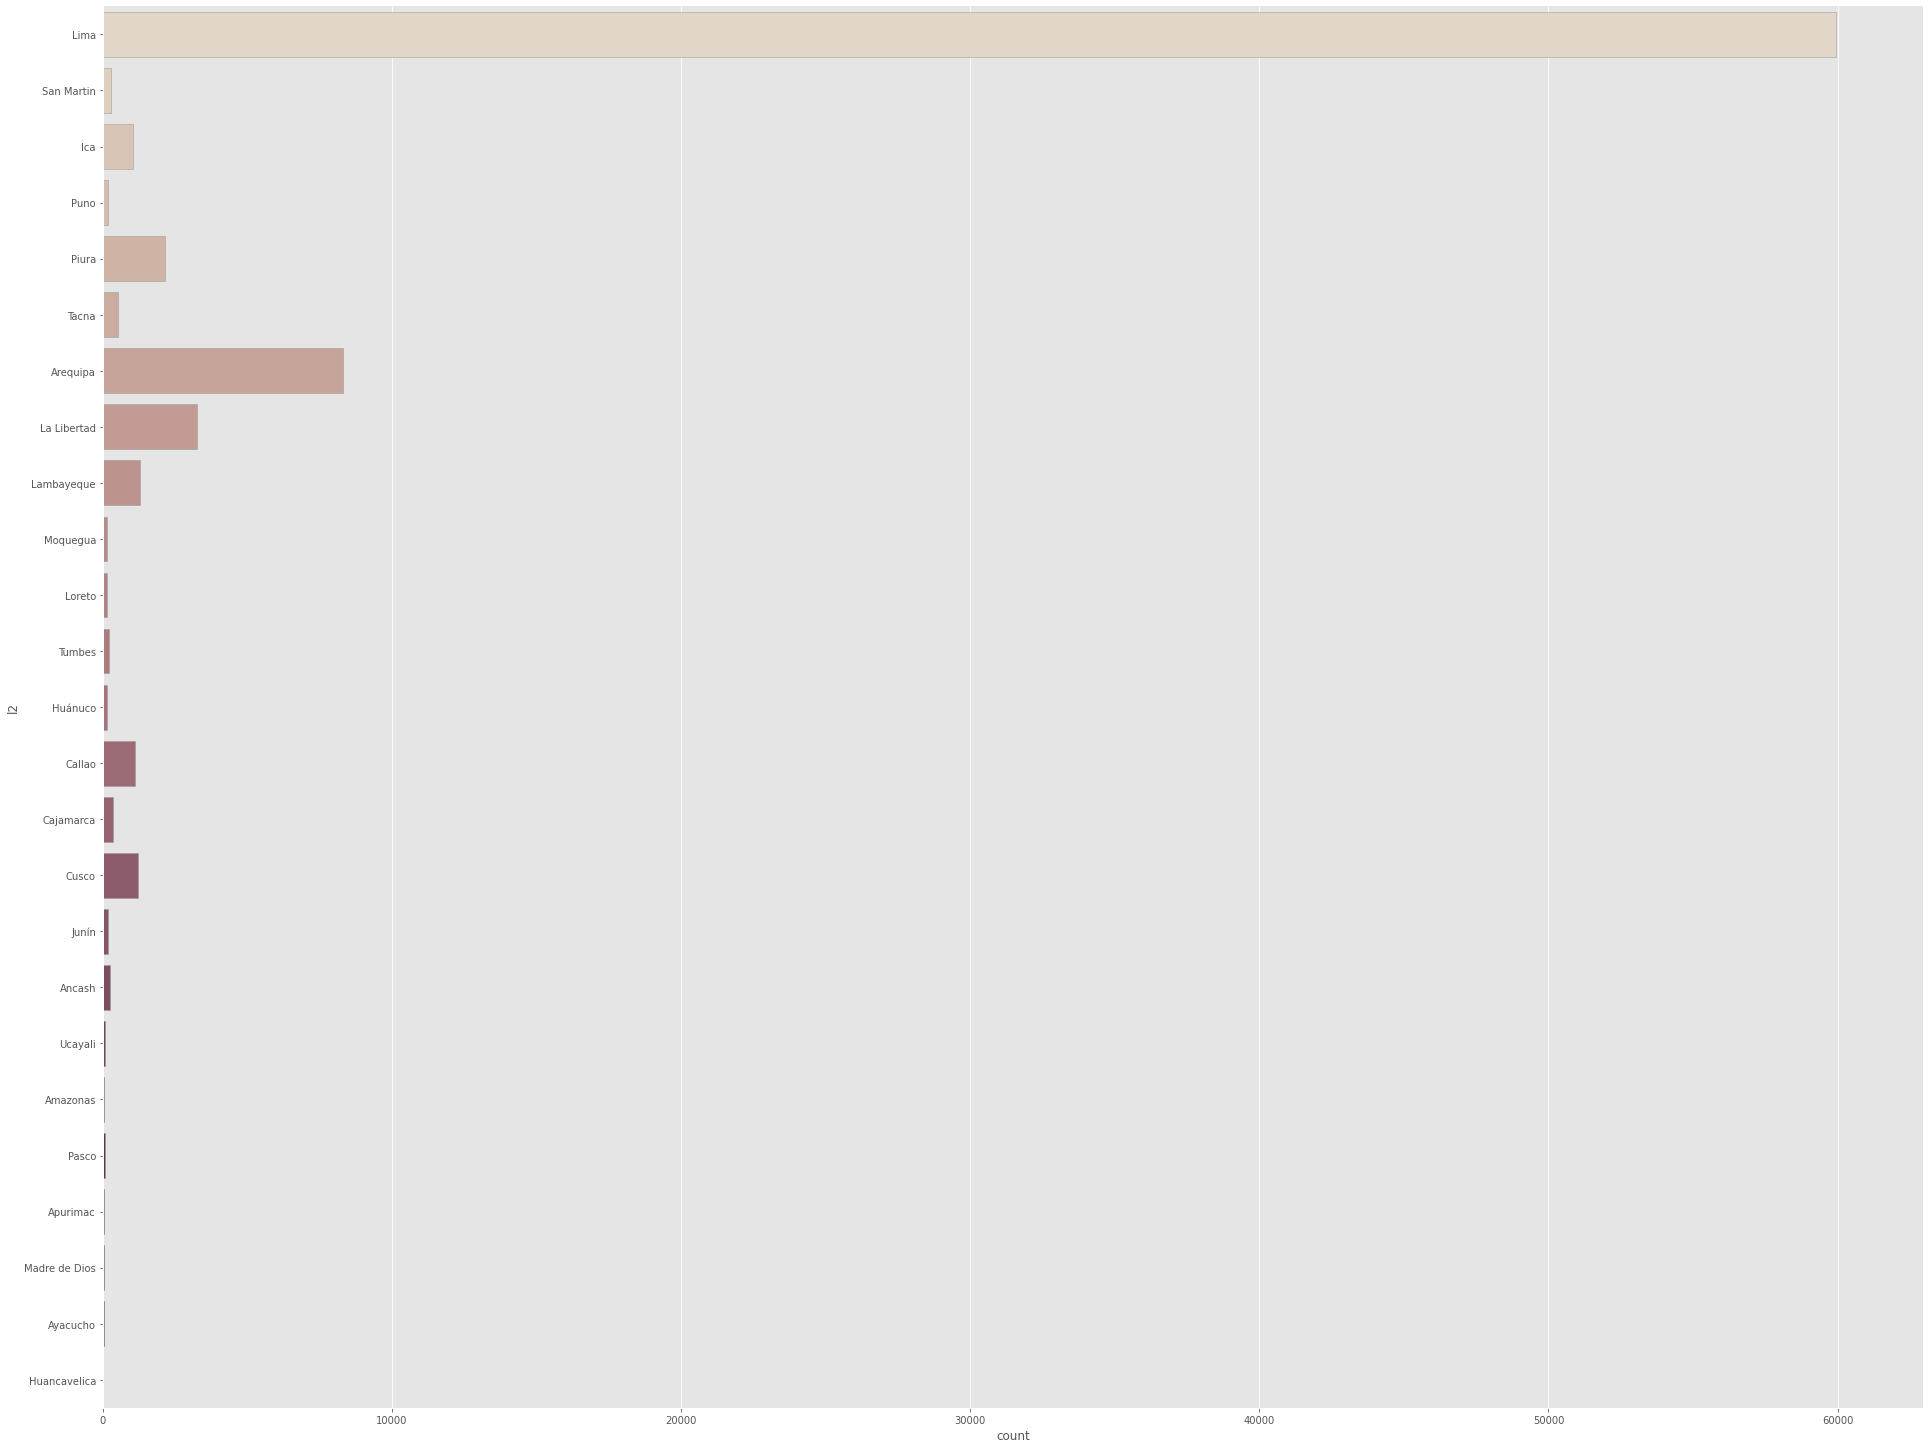

In [73]:
sns.catplot(y="l2", kind="count", height=20, aspect=20/15,
            palette="ch:.25", edgecolor=".6",
            data=df)

In [77]:
df["l3"].value_counts()

Lima                 55525
Arequipa              7778
Trujillo              2528
Cañete                2429
Piura                 1550
                     ...  
Ambo                     1
Padre Abad               1
Santiago de Chuco        1
Tarma                    1
Huancavelica             1
Name: l3, Length: 82, dtype: int64

In [78]:
df["rooms"].value_counts()

3.0     8843
2.0     3142
4.0     2873
1.0     1487
5.0     1332
6.0      776
7.0      406
8.0      293
10.0     175
9.0      142
20.0     129
12.0      93
11.0      59
13.0      50
14.0      41
15.0      41
16.0      28
17.0      25
18.0      19
19.0      12
Name: rooms, dtype: int64

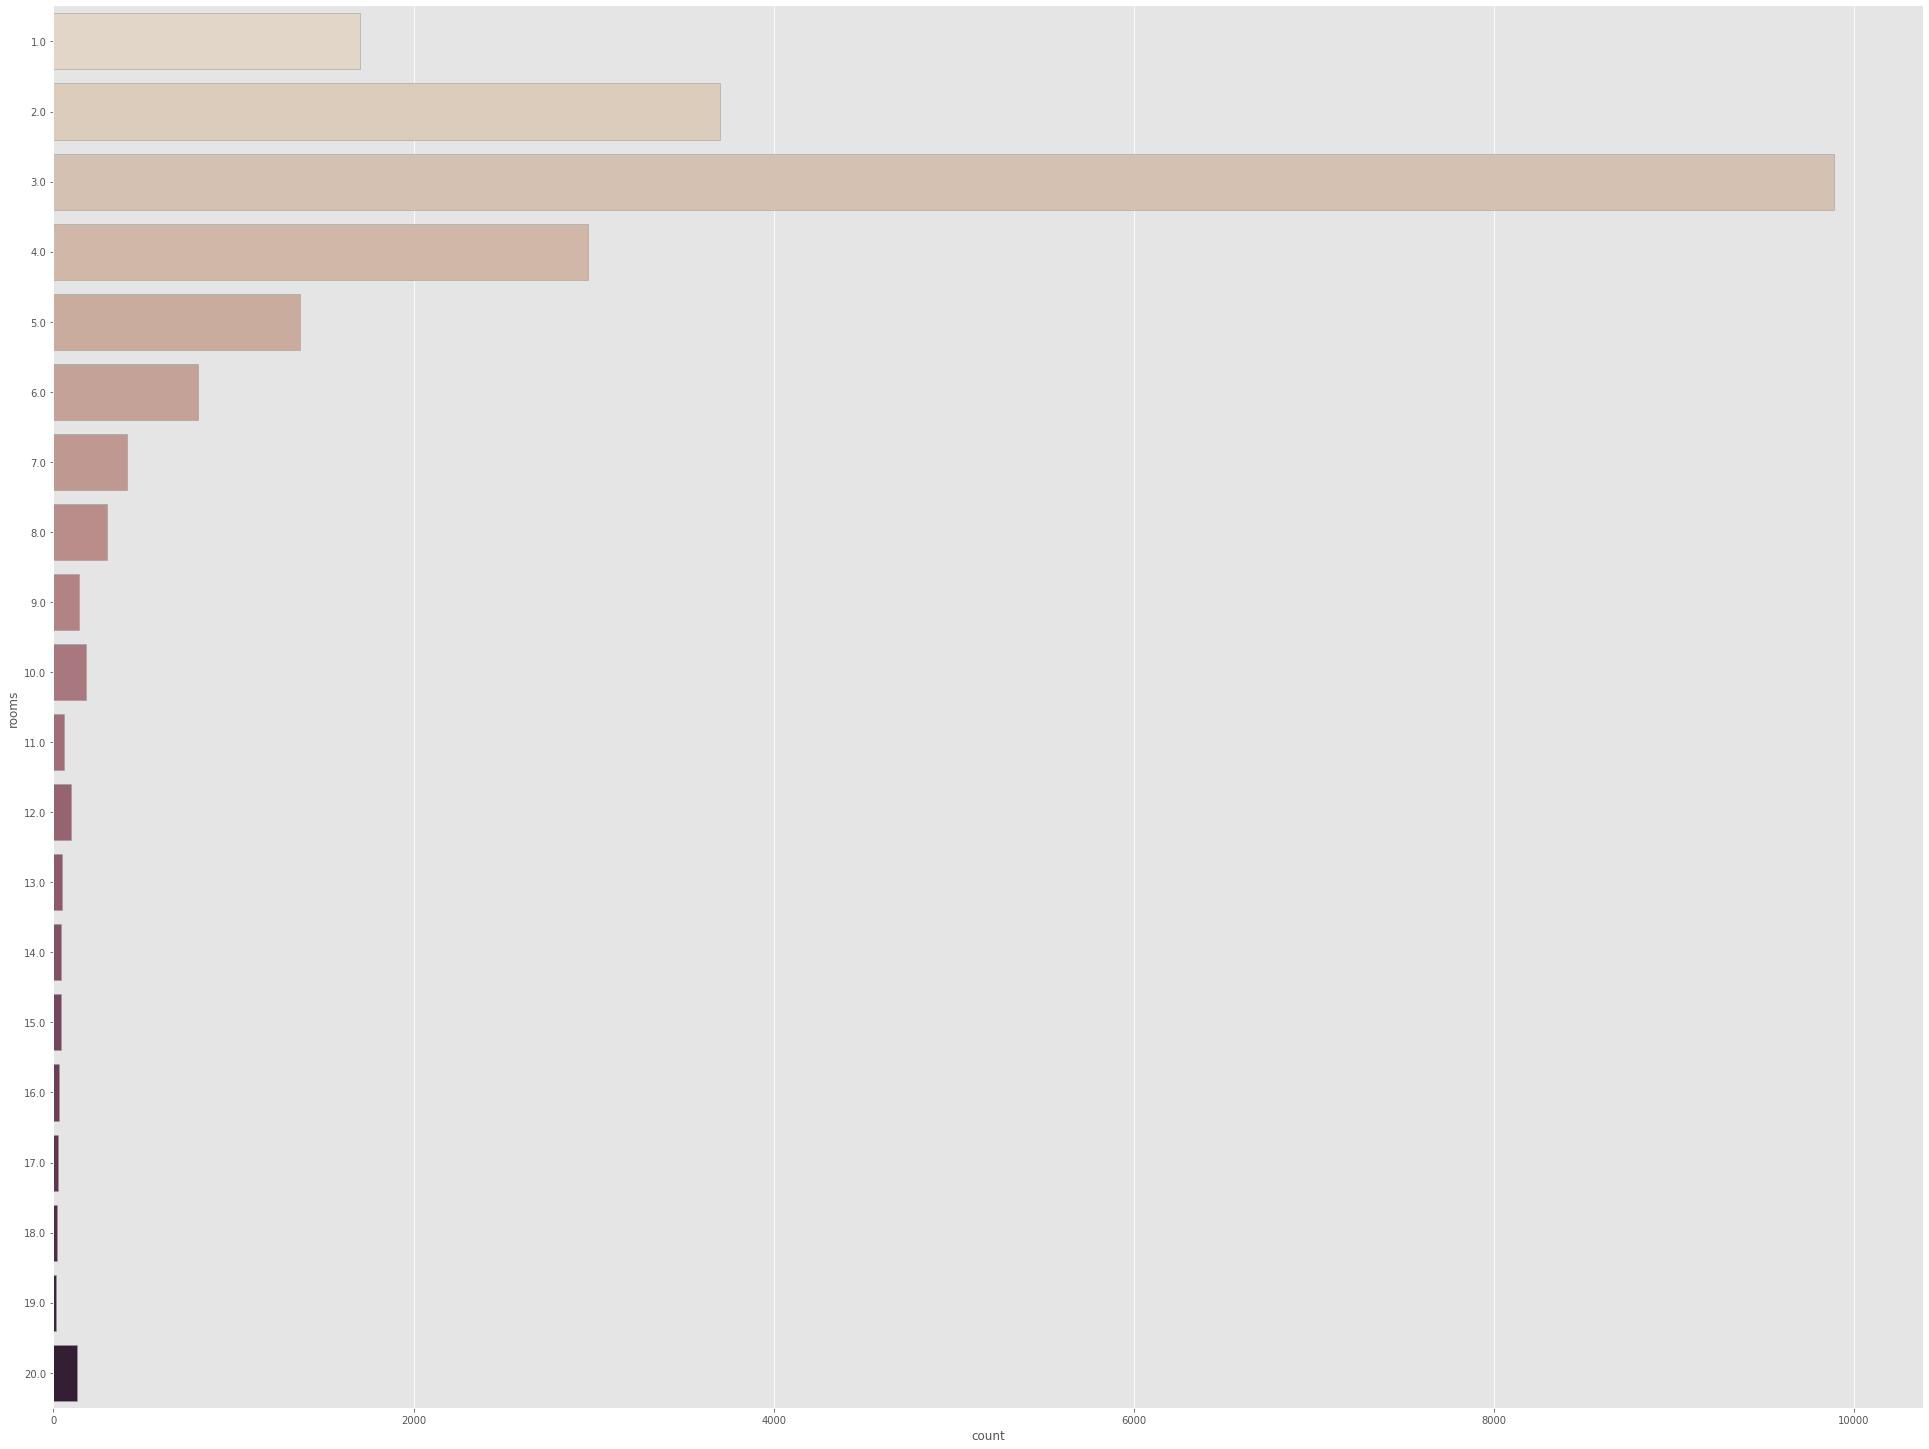

In [58]:
sns.catplot(y="rooms", kind="count", height=20, aspect=20/15,
            palette="ch:.25", edgecolor=".6",
            data=df)

In [79]:
df["bedrooms"].value_counts()

3.0     12685
4.0      4522
2.0      3866
5.0      1981
0.0      1363
1.0      1157
6.0       975
7.0       427
10.0      366
8.0       309
9.0       155
20.0       82
12.0       43
11.0       38
15.0       37
13.0       33
14.0       31
16.0       25
17.0       14
38.0       12
18.0       11
19.0       10
25.0        7
40.0        5
30.0        5
27.0        4
21.0        4
22.0        3
32.0        3
24.0        2
26.0        2
23.0        2
36.0        1
45.0        1
31.0        1
50.0        1
48.0        1
Name: bedrooms, dtype: int64

In [81]:
df["bathrooms"].value_counts()

2.0     19140
3.0     13795
4.0      7457
1.0      7015
5.0      3192
6.0      1466
10.0      535
7.0       503
8.0       376
9.0       184
12.0       61
11.0       43
14.0       37
16.0       33
15.0       27
20.0       26
13.0       25
18.0       18
17.0       14
19.0        7
Name: bathrooms, dtype: int64

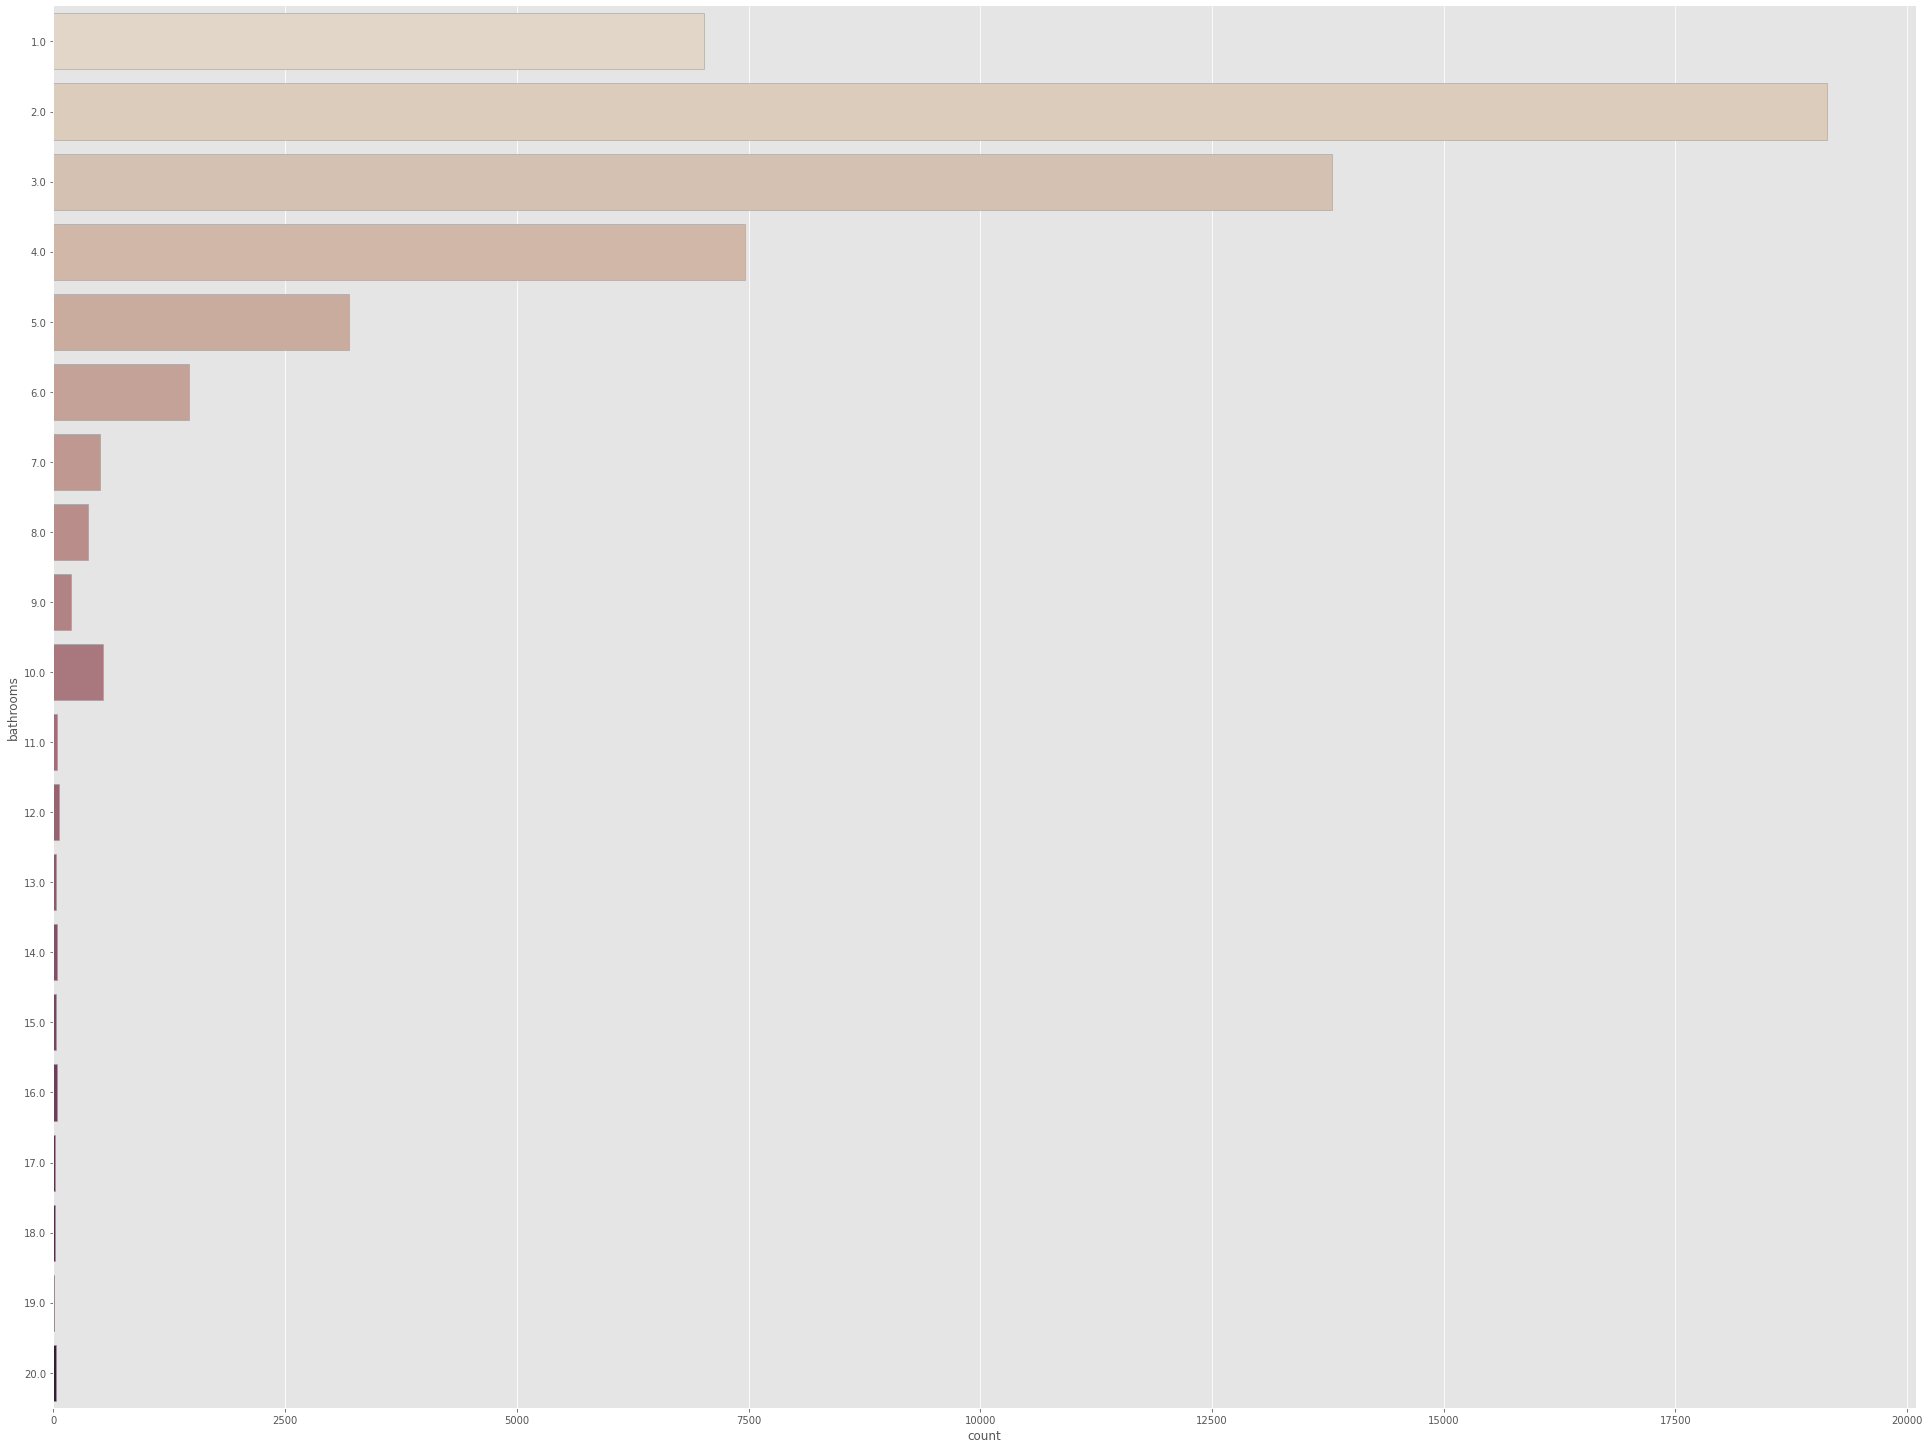

In [80]:
sns.catplot(y="bathrooms", kind="count", height=20, aspect=20/15,
            palette="ch:.25", edgecolor=".6",
            data=df)

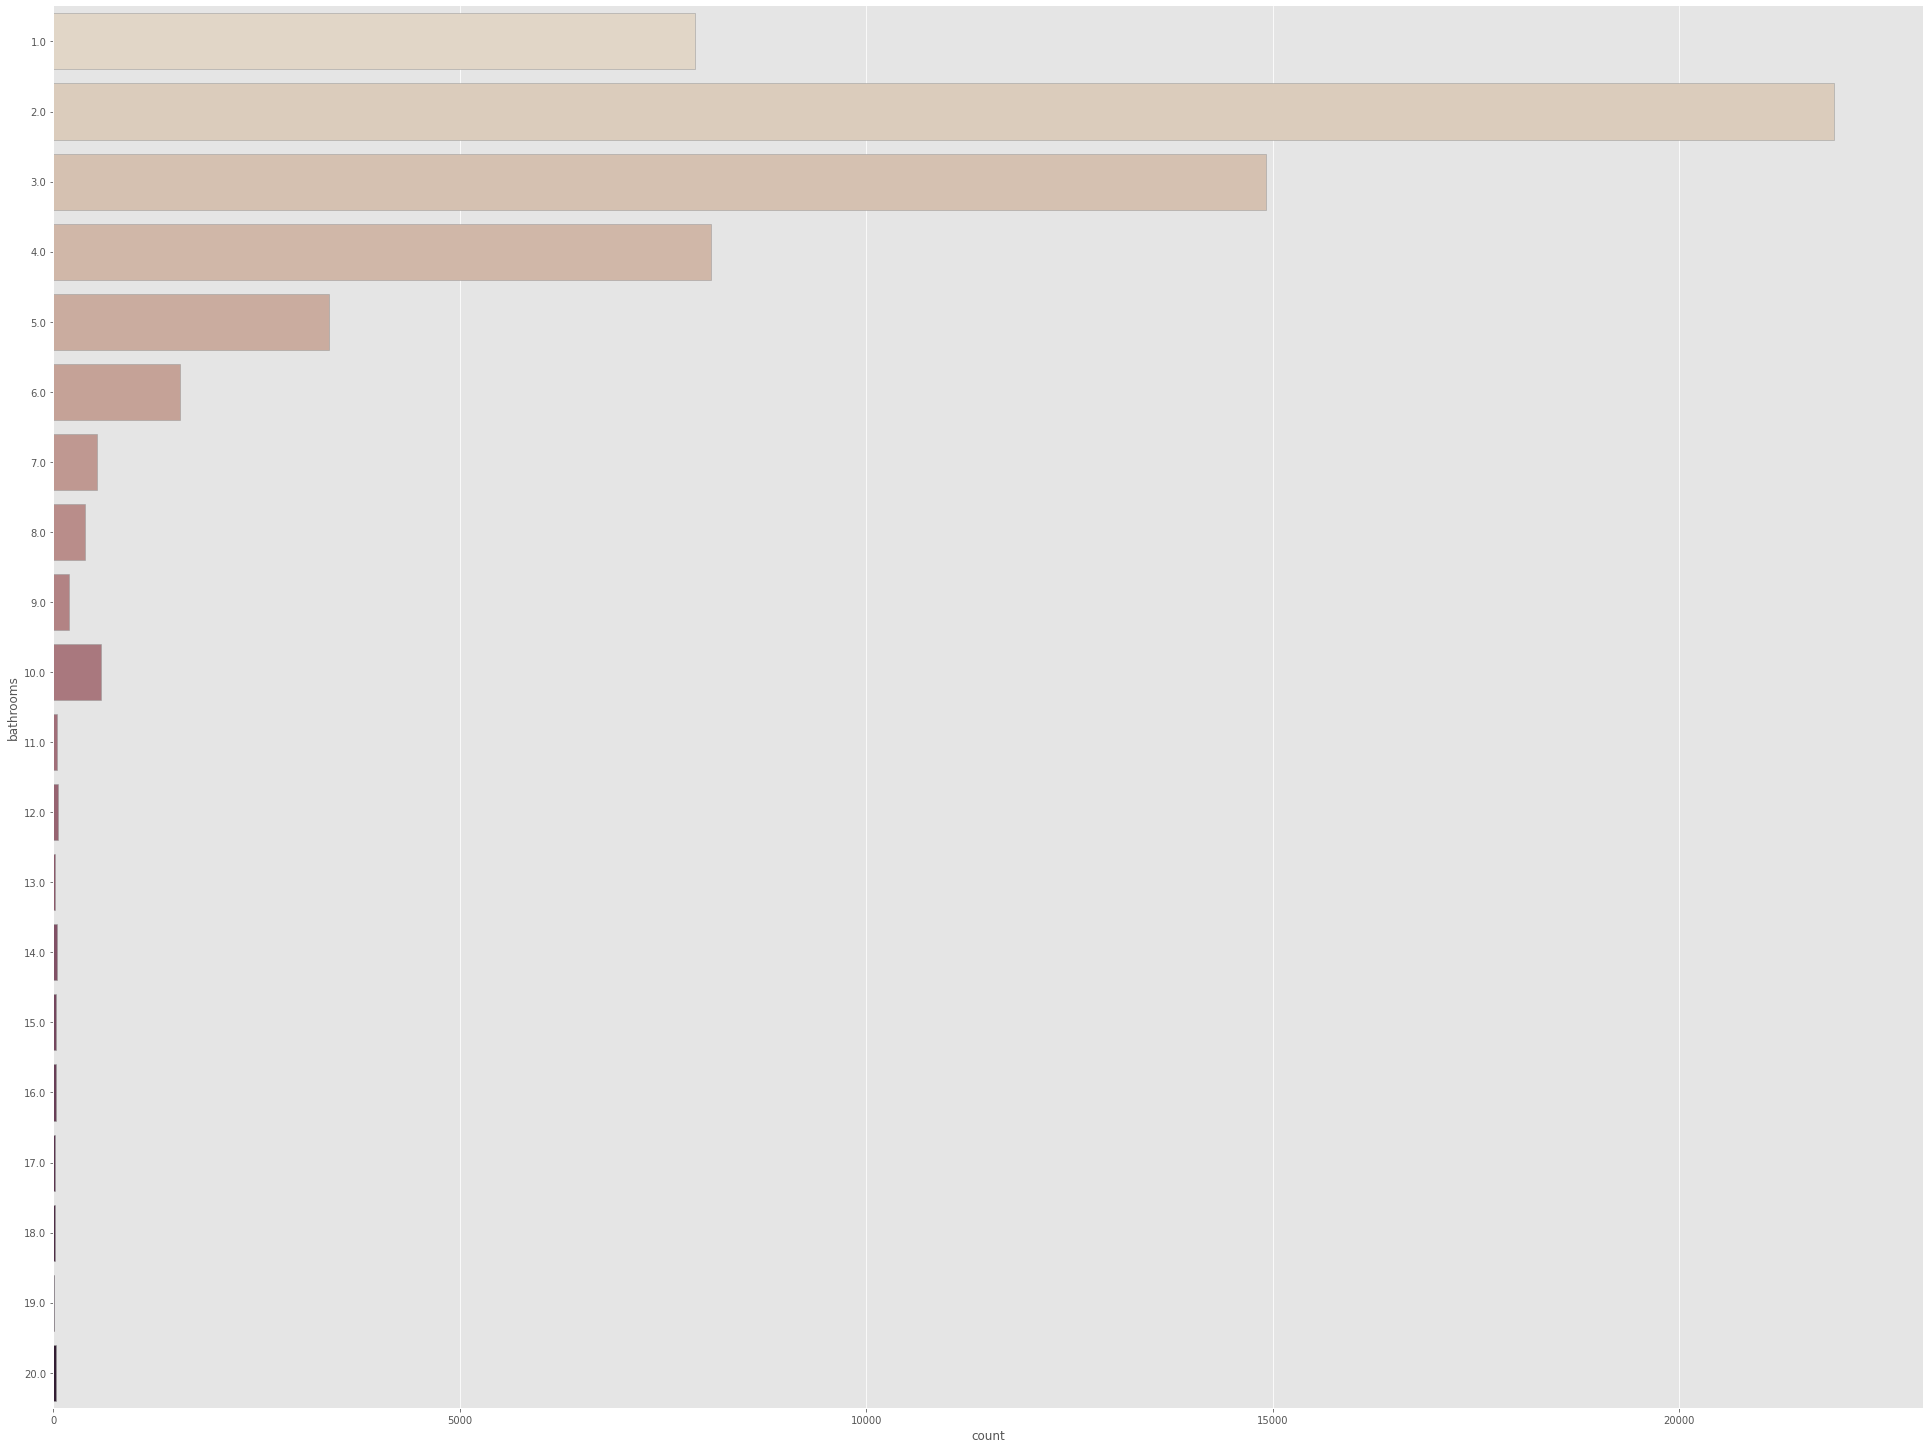

In [60]:
sns.catplot(y="bathrooms", kind="count", height=20, aspect=20/15,
            palette="ch:.25", edgecolor=".6",
            data=df)

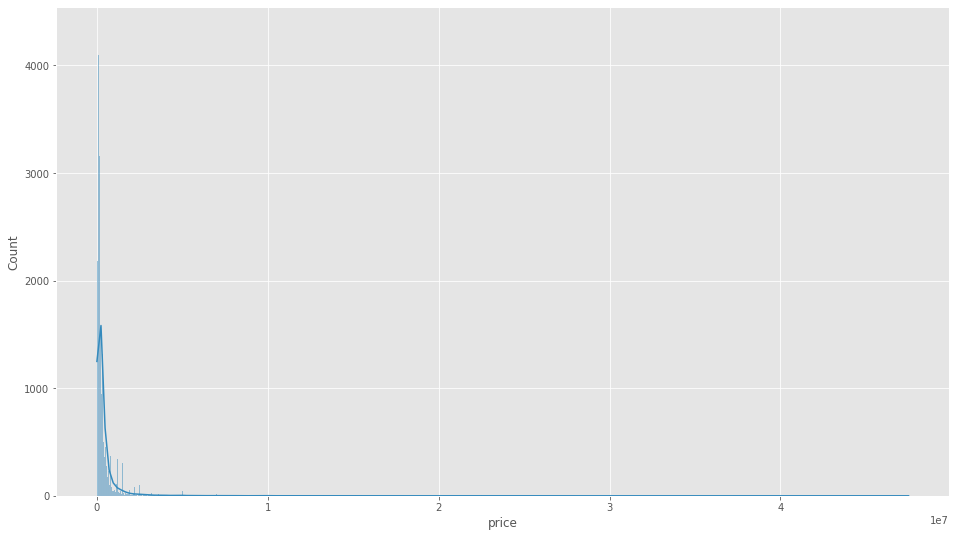

In [74]:
sns.histplot(data=df, x="price", kde=True)

In [75]:
df.columns

Index(['l1', 'l2', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'price', 'property_type'],
      dtype='object')

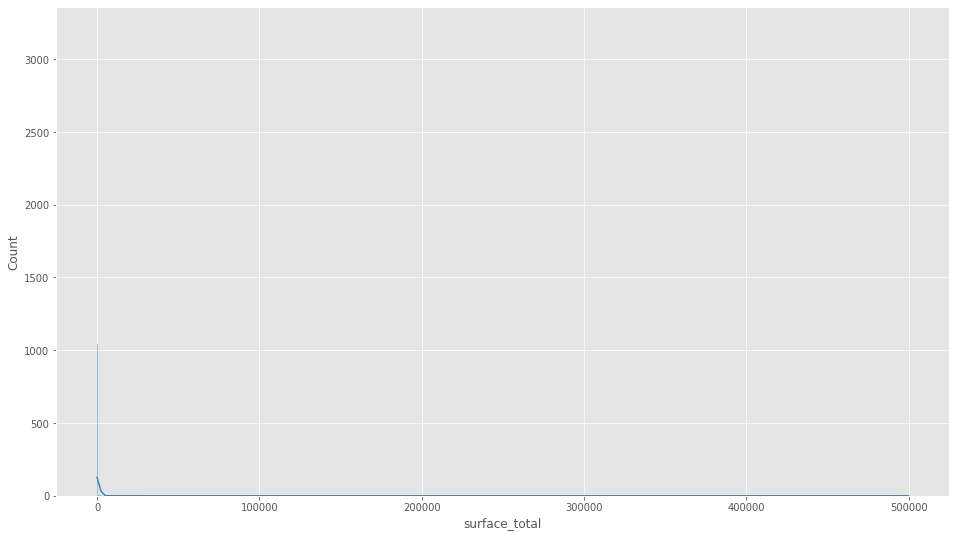

In [76]:
sns.histplot(data=df, x="surface_total", kde=True)